# IMPORT ALL REQUIREMENTS

In [1129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from xgboost import XGBClassifier

## import data csv

In [1130]:
# df = pd.read_csv("./Data Color.csv")
# df = pd.read_excel("./data_uang_gemastik.xlsx")
df = pd.read_csv("./data_colors.csv")

In [1131]:
df

,red_freq,green_freq,blue_freq,value
0,66,86,75,1000
1,66,86,75,1000
2,72,84,76,1000
3,72,84,76,1000
4,72,83,76,1000
...,...,...,...,...
1903,62,86,75,100000
1904,62,83,74,100000
1905,54,89,78,100000
1906,67,99,88,100000


In [1132]:
df.dtypes

red_freq      int64
green_freq    int64
blue_freq     int64
value         int64
dtype: object

# EDA

## Data Preprocessing and Feature Engineering

In [1133]:
# drop the date time column

# df = df.drop(columns=["Date", "Time"])
df.dropna(inplace=True)

In [1134]:
display(df)

,red_freq,green_freq,blue_freq,value
0,66,86,75,1000
1,66,86,75,1000
2,72,84,76,1000
3,72,84,76,1000
4,72,83,76,1000
...,...,...,...,...
1903,62,86,75,100000
1904,62,83,74,100000
1905,54,89,78,100000
1906,67,99,88,100000


In [1135]:
df['value'] = df['value'].apply(lambda x: round(x)).astype(int).astype(str)

# df['red_freq'] = df['red_freq']*2
# df['green_freq'] = df['green_freq']*2
# df['blue_freq'] = df['blue_freq']*2

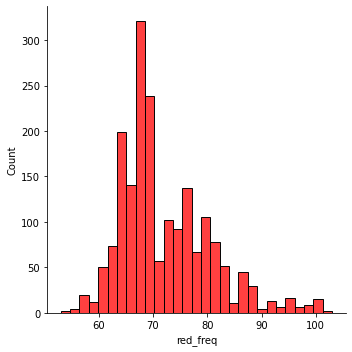

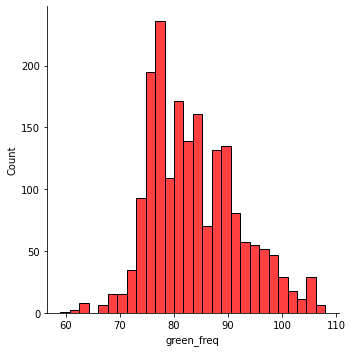

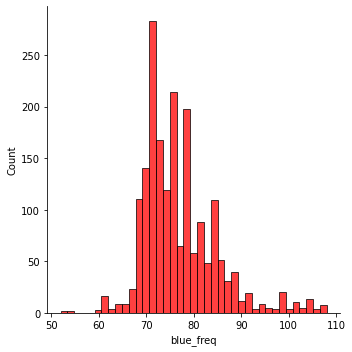

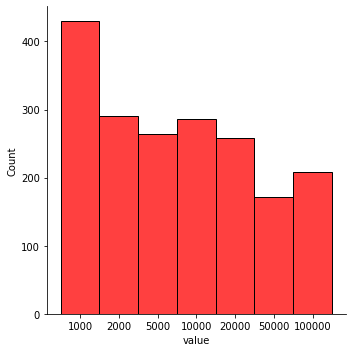

In [1136]:
for i in df.columns:
    sns.displot(data=df[i], color="red")

In [1137]:
display(df)

,red_freq,green_freq,blue_freq,value
0,66,86,75,1000
1,66,86,75,1000
2,72,84,76,1000
3,72,84,76,1000
4,72,83,76,1000
...,...,...,...,...
1903,62,86,75,100000
1904,62,83,74,100000
1905,54,89,78,100000
1906,67,99,88,100000


In [1138]:
## scaling dengan MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [1139]:
# memex = MinMaxScaler()
# col = ["Red Freq", "Blue Freq", "Green Freq"]
# df[col] = memex.fit_transform(df[col])
# display(df)

## Feature Engineering

setelah melihat pola pada nilai frekuensi r,g, dan b. ditemukan kemiripan untuk selisih r-g, r-b, dan g-b. maka akan dibuat feature baru pada data

In [1140]:
# df["r-g"] = df["red_freq"] - df["green_freq"]
# df["r-b"] = df["red_freq"] - df["blue_freq"]
# df["g-b"] = df["green_freq"] - df["blue_freq"]
# df["rgb"] = df["red_freq"]*df["green_freq"]*df["blue_freq"]
# df["r+g+b"] = df["red_freq"]+df["green_freq"]+df["blue_freq"]
df

,red_freq,green_freq,blue_freq,value
0,66,86,75,1000
1,66,86,75,1000
2,72,84,76,1000
3,72,84,76,1000
4,72,83,76,1000
...,...,...,...,...
1903,62,86,75,100000
1904,62,83,74,100000
1905,54,89,78,100000
1906,67,99,88,100000


# Modelling

In [1141]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, mean_squared_error, roc_auc_score, auc, roc_curve, recall_score, confusion_matrix




In [1142]:
X = df.drop(columns="value")
y = df["value"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

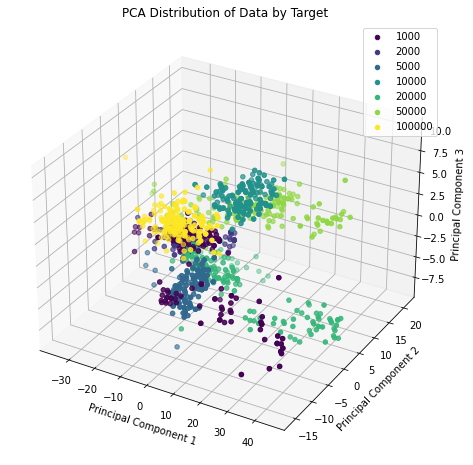

In [1143]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
# Instantiate PCA with the desired number of components
pca = PCA(n_components=3)  # You can choose 2 or 3 components for 2D or 3D visualization

# Fit and transform your data
pca_result = pca.fit_transform(X)
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2', 'PCA3'])
pca_df['Target'] = y

colors = plt.cm.viridis(np.linspace(0, 1, len(pca_df['Target'].unique())))

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the data points with colors based on class
for i, target_class in enumerate(pca_df['Target'].unique()):
    subset = pca_df[pca_df['Target'] == target_class]
    ax.scatter(subset['PCA1'], subset['PCA2'], subset['PCA3'], label=f'{target_class}', c=[colors[i]])

# Add labels and a legend
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('PCA Distribution of Data by Target')
plt.legend()

plt.show()
# sns.scatterplot(x='PCA1', y='PCA2', hue='Target', data=pca_df, palette='viridis', legend='full')
# plt.title('PCA Distribution of Data by Target')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
plt.show()

In [1144]:
display(X_train)
display(y_train)

,red_freq,green_freq,blue_freq
1351,79,81,79
1355,78,80,79
1607,100,100,83
1778,64,89,76
892,67,85,86
...,...,...,...
1130,79,96,81
1294,70,73,70
860,66,84,85
1459,72,75,74


1351     20000
1355     20000
1607     50000
1778    100000
892       5000
         ...  
1130     10000
1294     20000
860       5000
1459     20000
1126     10000
Name: value, Length: 1144, dtype: object

In [1145]:
# decision_tree = DecisionTreeClassifier(random_state=42)
# random_forest = RandomForestClassifier(random_state=42)
# svc = SVC(kernel="linear", random_state=42)
# logistic_regression = LogisticRegression(random_state=42)
# knn = KNeighborsClassifier(n_neighbors=6)
# models = [("Decision Tree",decision_tree), ("Random Forest", random_forest), ("SVC", svc), ("Logistic Regression", logistic_regression), ("KNN", knn) ]
xgb = XGBClassifier(learning_rate = 0.1, gamma = 0.1, max_depth = 12, n_estimators = 400)
xgb_model = ("XGBoost", xgb)

In [1146]:
from sklearn.preprocessing import LabelEncoder

label = {
    "1000":0,
    "2000":1,
    "5000":2,
    "10000":3,
    "20000":4,
    "50000":5,
    "100000":6
}

# Create a custom LabelEncoder class
class CustomLabelEncoder(LabelEncoder):
    def __init__(self, label_dict):
        self.label_dict = label_dict
        super().__init__()

    def fit(self, y):
        super().fit(y)
        self.classes_ = [self.label_dict[label] for label in self.classes_]

    def transform(self, y):
        return super().transform(y)

    def inverse_transform(self, y):
        y_original = [list(self.label_dict.keys())[list(self.label_dict.values()).index(encoded)] for encoded in y]
        return y_original
    

# Initialize the LabelEncoder
label_encoder = CustomLabelEncoder(label)

# Fit the LabelEncoder to your target classes and transform them
y_train_encoded = label_encoder.fit_transform(y_train)

In [1147]:
print(y_train_encoded)

[4 4 6 ... 5 4 1]


### Training

In [1148]:
# for i in models:
#     i[1].fit(X_train, y_train)
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'min_child_weight': [1, 2, 3],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=10,  # Number of random combinations to try
    cv=3,  # Number of cross-validation folds
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,  # Use all available CPU cores for parallel processing
    random_state=42  # Set a random seed for reproducibility
)

# random_search.fit(X_train, y_train_encoded)

xgb.fit(X_train, y_train_encoded)

# best_params = random_search.best_params_
# best_xgb_model = random_search.best_estimator_
# print(best_params)
# print(best_xgb_model)

# best_xgb = ("XGBoost", best_xgb_model)





XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

### Prediction

XGBoost f1 score= 0.9435918231934076
XGBoost accuracy = 0.943717277486911
XGBoost precision = 0.9543701689429535
XGBoost recall = 0.9493300836987412
['20000', '1000', '5000', '50000', '1000', '5000', '1000', '10000', '10000', '2000', '20000', '1000', '2000', '1000', '1000', '5000', '2000', '50000', '1000', '20000', '1000', '50000', '2000', '20000', '10000', '50000', '1000', '20000', '100000', '2000', '10000', '50000', '100000', '20000', '1000', '20000', '20000', '20000', '1000', '5000', '10000', '1000', '1000', '10000', '100000', '100000', '1000', '20000', '1000', '20000', '2000', '2000', '20000', '10000', '1000', '2000', '5000', '1000', '50000', '1000', '100000', '2000', '50000', '5000', '1000', '2000', '5000', '20000', '1000', '20000', '20000', '2000', '5000', '1000', '2000', '1000', '100000', '50000', '10000', '10000', '100000', '10000', '100000', '5000', '10000', '100000', '1000', '100000', '100000', '10000', '20000', '1000', '5000', '20000', '10000', '10000', '50000', '2000', '100

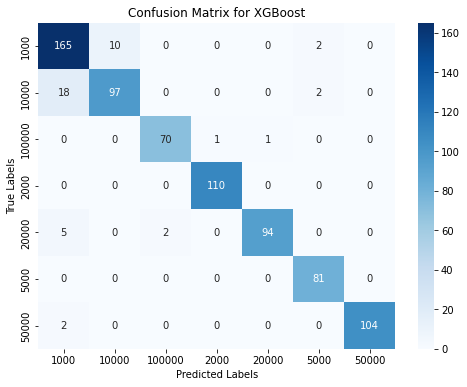

In [1149]:
# model_names = []
# y_preds = []


# for model in models:    
#     y_pred = model[1].predict(X_test)

#     # Calculate the confusion matrix
#     # confusion = confusion_matrix(y_true=y_test, y_pred=y_pred)

#     # # Print the confusion matrix
#     # print(f"Confusion matrix for {model[0]}:")
#     # print(confusion)

#     f1 = f1_score(y_true=y_test, y_pred=y_pred, average='weighted')
#     accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
#     precision = precision_score(y_test, y_pred, average='micro')
#     mse = mean_squared_error(y_test, y_pred)
#     recall = recall_score(y_test, y_pred, average='micro')
#     print(f"{model[0]} f1 score= {f1}")
#     print(f"{model[0]} accuracy = {accuracy}")
#     print(f"{model[0]} precision = {precision}")
#     print(f"{model[0]} recall = {recall}")
#     print(f"{model[0]} mse = {mse}")
#     confusion = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=sorted(set(y_test)))
#     model_name = model[0]

#     # Create a heatmap for the confusion matrix
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues",
#                 xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
#     plt.title(f"Confusion Matrix for {model_name}")
#     plt.xlabel("Predicted Labels")
#     plt.ylabel("True Labels")
#     plt.show()

y_test = label_encoder.fit_transform(y_test)


y_pred = xgb_model[1].predict(X_test)

# Calculate the confusion matrix
# confusion = confusion_matrix(y_true=y_test, y_pred=y_pred)

# # Print the confusion matrix
# print(f"Confusion matrix for {xgb_model[0]}:")
# print(confusion)
y_test = label_encoder.inverse_transform(y_test)
y_pred = label_encoder.inverse_transform(y_pred)
f1 = f1_score(y_true=y_test, y_pred=y_pred, average='weighted')
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
print(f"{xgb_model[0]} f1 score= {f1}")
print(f"{xgb_model[0]} accuracy = {accuracy}")
print(f"{xgb_model[0]} precision = {precision}")
print(f"{xgb_model[0]} recall = {recall}")
print(y_pred)
confusion = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=sorted(set(y_test)))
xgb_model_name = xgb_model[0]

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
plt.title(f"Confusion Matrix for {xgb_model_name}")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### Analisis hasil prediksi

Dari hasil prediksi, model decision tree dan random forest memiliki akurasi tertinggi yaitu sekitar 95%

### pemilihan model setelah hasil analisis

In [1150]:
# model = models[1][1]
# model = KNeighborsClassifier(n_neighbors=20)
model = XGBClassifier(random_state=42, learning_rate = 0.1, gamma = 0.1, max_depth = 12, n_estimators = 400)
y = label_encoder.fit_transform(y)
print(y)
model.fit(X, y)


[0 0 0 ... 2 2 2]


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

### Import model

In [1151]:
# import joblib
# model_filename = 'model.joblib'
# joblib.dump(model, model_filename)
model.save_model('xgboost_model.bin')# Assuming you have a trained XGBoost model object named 'model'
model.save_model('xgboost_model.json')
